*   ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap02/'
OutputDir    = '2ModelSel-090105Line/'
FileBaseName = '2ModelSel-090105Line'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2ModelSel-090105Line/
 d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2ModelSel-090105Line/ is exist.


最確値を書式化して文字列として返す関数
```
Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False )
```
*   返値: 書式化された文字列を返す。
*   v_mean: 平均値
*   v_std:  標準偏差
*   s_unit: 値の単位(文字列)
*   std_2digit=True: 標準偏差を2桁表示。Falseにすると1桁表示
*   latex=False: テキスト文字列として出力。Trueでは、図などでlatex表示できる文字列で出力。

In [4]:
def Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False ):
  #
  # 平均値の冪数
  order_mean = np.floor( np.log10(v_mean) )
  # print( 'order_mean=', order_mean )
  #
  # 標準偏差の冪数
  if std_2digits:
    # 標準偏差を有効2桁表示
    order_std  = np.floor( np.log10(v_std) - 1.0 )
  else:
    # 標準偏差を有効1桁表示
    order_std  = np.floor( np.log10(v_std) - 0.0 )
  # print( 'order_std=', order_std )
  #
  # 平均値の冪数と標準偏差の冪数の符号が同じか?
  if order_mean * order_std > 0.0:
    # 例1
    # v_mean = 4.60572E5
    # v_std  = 8.96E3
    # 例2
    # v_mean = 4.605723E-2
    # v_std  = 8.96E-5
    multi_order = order_std+1
    #
    # 共通する冪数
    multi = 10.0**multi_order
    #
    # 共通する冪数で規格化
    v_mean = v_mean / multi
    v_std  = v_std  / multi
    #
    # 共通した冪数で指数をくくって、係数は少数第1位
    if latex:
      out_str = r'(%+.1f $\pm$ %.1f)$\times10^{%+d}$ ' % (v_mean, v_std, multi_order) + s_unit
    else:
      out_str = '(%+.1f +/- %.1f)x10^(%+d) ' % (v_mean, v_std, multi_order) + s_unit
    #
  else:
    # 平均値の冪数と標準偏差の冪数の符号が異なる
    # 例2
    # v_mean = 4.605723
    # v_std  = 0.0896
    fmt_std1 = r'$%%+.%df$' % -order_std
    fmt_std2 = r'$%%.%df$'  % -order_std
    if latex:
      fmt_str = fmt_std1 + r' $\pm$ ' + fmt_std2 + ' ' + s_unit
    else:
      fmt_str = fmt_std1 + ' +/- ' + fmt_std2 + ' ' + s_unit
    #
    out_str = fmt_str % (v_mean, v_std)
  #
  return out_str

データと解析結果を描くグラフ関数

In [5]:
############################################
def GrfLine( Xdata, Ysets, title=r'$y=ax+b$', xlim=None, ylim=None ):
  #
  plt.rcParams['font.size'] = 24
  #
  fig = plt.figure( figsize=(12,8) )
  #
  fig.subplots_adjust(left=0.12, right=0.65, top=0.90, bottom=0.12)
  #
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( r'$x$' )
  ax1.set_ylabel( r'$y$' )
  #
  if xlim is not None:
    ax1.set_xlim( xlim )
  #
  if ylim is not None:
    ax1.set_ylim( ylim )
  #
  # y-axis
  # ax1.axvline( x_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{x}$' )
  ax1.axvline( 0.0, 0, 1.0, color='black', linestyle='solid' )
  #
  # x-axis
  # ax1.axhline( y_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{y}$' )
  ax1.axhline( 0.0, 0, 1.0, color='black', linestyle='solid' )
  #
  for Yset in Ysets:
    #
    Ydata  = Yset[0]
    Ylabel = Yset[1]
    Ymode  = Yset[2]
    Ycolor = Yset[3]
    #
    if Ymode == 1:
      # plot / solid line
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='solid', label=Ylabel )
    elif  Ymode == 2:
      # plot / dashed
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dashed', label=Ylabel )
    elif  Ymode == 3:
      # plot / dotted
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dotted', label=Ylabel )
    else:
      # scatter
      ax1.scatter( Xdata, Ydata, color=Ycolor, s=100.0, label=Ylabel )
    #
  #
  plt.title( title )
  plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  #
  plt.show()
  #
  return fig

データ点数(固定)
* モデル選択の変化を系統的に例示するため、データ点数 $n=21$ で固定する。
* データに重畳する正規ノイズも平均値が0とし、すべてのデータで共通して用いる。

In [6]:
############################################
# データ点数(固定)
n = 21
#
############################################
# データに重畳する正規ノイズ
# 実際の標準偏差が1になるようにして、規格化して
# 共通した物をベースにする。
#
# 乱数seed
np.random.seed( 1246 )
# y値ノイズ
y_noise_norm = np.random.normal( loc=0, scale=1.0, size=n )
#
# 平均値をゼロとする
mean_ = np.mean( y_noise_norm )
y_noise_norm = y_noise_norm - mean_
#
std_ = np.std( y_noise_norm )
y_noise_norm = y_noise_norm / std_
print( np.std( y_noise_norm ) )

1.0


直線回帰するデータは$y=ax+b$で生成し、モデル選択する候補関数として以下のものを考える。
1. $y=b$
2. $y=ax$
3. $y=ax+b$

Case 1 : 直線の様なデータの直線回帰のモデル選択
* $a_{\rm true}=0.3$, $b_{\rm true}=0.2$とする。
* $\sigma_{\rm{}noise}=0.40$とする
* $x$軸の範囲: $x_{\rm{}range}=1.0$で、$-x_{\rm{}range}\leq{}x\leq+x_{\rm{}range}$

In [7]:
############################################
# Case 1
# 重畳するノイズ強度によるモデル選択変化
#
##########################################
# データの x の範囲: -x_range
x_range = 1.0
# x軸
x_data = np.linspace(-x_range,x_range, num=n, endpoint=True )
#
##########################################
# 真値: 傾き a
a_true = 0.3
a_true_str = r'$a_{\rm{}true}=%+.2f$' % a_true
#
# 真値: 切片
b_true = 0.2
b_true_str = r'$b_{\rm{}true}=%+.2f$' % b_true
#
# 真値直線
y_true = a_true * x_data + b_true
#
##########################################
# y値ノイズの標準偏差
sigma_noise = 0.4
sigma_str = r'$\sigma=%+.3f$' % sigma_noise
y_noise = y_noise_norm * sigma_noise
#
# y値ノイズの実際の標準偏差
y_noise_std = np.std( y_noise )
y_noise_std_str = r'$\sigma=%+.3f$' % y_noise_std
#
##########################################
# ノイズの重畳した yデータ
y_data = y_true + y_noise

* 解析対象のデータを描画

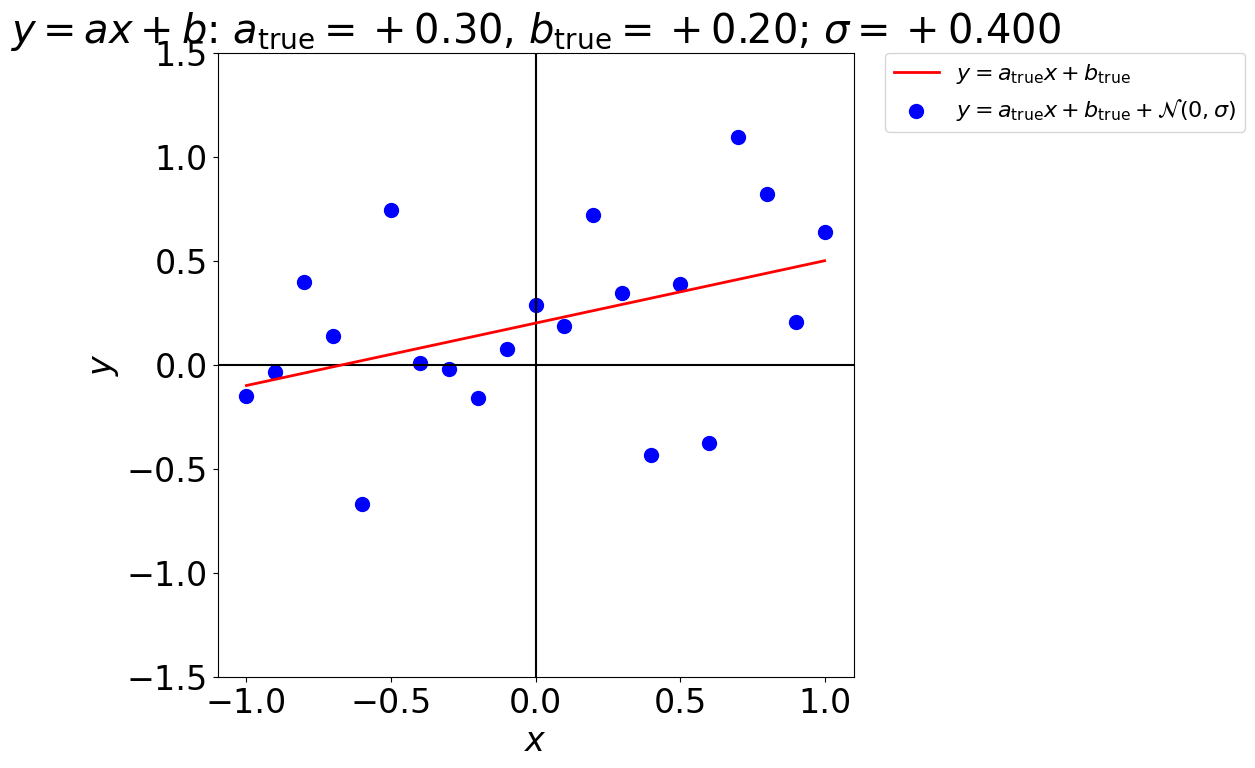

In [8]:
############################################
# グラフ描画
grf_title = r'$y=ax+b$: ' + a_true_str + ', ' + b_true_str + '; ' + y_noise_std_str
#
Ysets = [ [y_true, r'$y=a_{\rm{}true}x+b_{\rm{}true}$',                                            1, 'red'  ],
          [y_data, r'$y=a_{\rm{}true}x+b_{\rm{}true}+{\cal{}N}(0,\sigma)$',                       0, 'blue' ]
          ]
#
fig = GrfLine( x_data, Ysets, title=grf_title, ylim=(-1.5,1.5) )
#
# 図をpdfに保存
pdfName = FilePath + FileBaseName + '-Data-01.pdf'
fig.savefig( pdfName )

ベイズ自由エネルギーと分配関数と解析結果グラフを返す関数
* データセットで決まる平均値
$$
\overline{x}=\frac{1}{M}\sum^{M} x_{m},
\quad
\overline{x^2}=\frac{1}{M}\sum^{M} x_{m}^{2},
\quad
\overline{xy}=\frac{1}{M}\sum^{M} x_{m}y_{m},
$$
$$
\overline{y}=\frac{1}{M}\sum^{M} y_{m},
\quad
\overline{y^2}=\frac{1}{M}\sum^{M} y_{m}^{2},
$$

In [9]:
##########################################
def Means_xydata( x_data_, y_data_ ):
  # データセットで決まる平均値
  mean_x_  = np.mean( x_data_ )
  mean_y_  = np.mean( y_data_ )
  mean_x2_ = np.mean( x_data_ * x_data_ )
  mean_y2_ = np.mean( y_data_ * y_data_ )
  mean_xy_ = np.mean( x_data_ * y_data_ )
  #
  return mean_x_, mean_y_, mean_x2_, mean_y2_, mean_xy_

In [10]:
##########################################
mean_x, mean_y, mean_x2, mean_y2, mean_xy = Means_xydata( x_data, y_data )

* $a$, $b$の推定値と誤差 (完全平方化しているのでモデルに依存しない)
$$
a_0=\frac{\overline{xy}}{\overline{x^{2}}},
\quad
b_0=\overline{y}
$$

$$
\sigma_{a}=\frac{\sigma_{\rm noise}}{\sqrt{M\,\overline{x^2}}},
\quad
\sigma_{b}=\frac{\sigma_{\rm noise}}{\sqrt{M}},
$$

In [11]:
##########################################
def LSQM_a0b0( n_, x_data_, y_data_, sigma_noise_ ):
  #
  mean_x_, mean_y_, mean_x2_, mean_y2_, mean_xy_ = Means_xydata( x_data_, y_data_ )
  # a, bの推定値と誤差
  # (完全平方化しているのでモデルに依存しない)
  a_0_ = mean_xy_ / mean_x2_
  b_0_ = mean_y_
  sigma_a_0_ = sigma_noise_ / np.sqrt( n_ * mean_x2_ )
  sigma_b_0_ = sigma_noise_ / np.sqrt( n_ )
  #
  return a_0_, b_0_, sigma_a_0_, sigma_b_0_

In [12]:
##########################################
a_0, b_0, sigma_a_0, sigma_b_0 = LSQM_a0b0( n, x_data, y_data, sigma_noise )
#
a_str = Format_MostProbableValue( a_0, sigma_a_0, '', std_2digits=True, latex=True )
b_str = Format_MostProbableValue( b_0, sigma_b_0, '', std_2digits=True, latex=True )

* データセットで決まる各モデルの誤差関数の定数項
$$
y=b
\;\;\;
\rightarrow
\;\;\;
E_{1}=\frac{1}{2}
\left[
  \overline{y^2}
  -
  (\overline{y})^{2}
\right]
$$

$$
y=ax
\;\;\;
\rightarrow
\;\;\;
E_{2}=\frac{1}{2}
\left[
  \overline{y^2}
  -
  \frac{(\overline{xy})^{2}}{\overline{x^2}}
\right]
$$

$$
y=ax+b
\;\;\;
\rightarrow
\;\;\;
E_{3}=\frac{1}{2}
\left[
  \overline{y^2}
  -
  (\overline{y})^{2}
  -
  \frac{(\overline{xy})^{2}}{\overline{x^2}}
\right]
$$


* 各モデルの分配関数
$$
y=b
\;\;\;
\rightarrow
\;\;\;
Z_{1}
=
\left(
  \frac{1}{
    2\pi
    \sigma^{2}
  }
\right)^{\frac{M}{2}}
\exp\left[
  -\frac{M}{\sigma^2}
  E_{1}
\right]
\times
\sqrt{\frac{2\pi\sigma^2}{M}}
$$

$$
y=ax
\;\;\;
\rightarrow
\;\;\;
Z_{2}
=
\left(
  \frac{1}{
    2\pi
    \sigma^{2}
  }
\right)^{\frac{M}{2}}
\exp\left[
  -\frac{M}{\sigma^2}
  E_{2}
\right]
\times
\sqrt{\frac{2\pi\sigma^2}{M\,\overline{x^2}}}
$$

$$
y=ax+b
\;\;\;
\rightarrow
\;\;\;
Z_{3}
=
\left(
  \frac{1}{
    2\pi
    \sigma^{2}
  }
\right)^{\frac{M}{2}}
\exp\left[
  -\frac{M}{\sigma^2}
  E_{3}
\right]
\times
\sqrt{\frac{2\pi\sigma^2}{M\,\overline{x^2}}}
\times
\sqrt{\frac{2\pi\sigma^2}{M}}
$$

* 各モデルのベイズ自由エネルギー
$$
y=b
\;\;\;
\rightarrow
\;\;\;
F_{1}
=
\frac{1}{2}
\left[
  M
  \ln\left(2\pi\sigma^2\right)
  +
  \frac{2M}{\sigma^2}
  E_{1}
  -
  \ln(2\pi\sigma^2)
  +
  \ln(M)
\right]
$$

$$
y=ax
\;\;\;
\rightarrow
\;\;\;
F_{2}
=
\frac{1}{2}
\left[
  M
  \ln\left(2\pi\sigma^2\right)
  +
  \frac{2M}{\sigma^2}
  E_{2}
  -
  \ln(2\pi\sigma^2)
  +
  \ln(M)
  +
  \ln\left(\overline{x^2}\right)
\right]
$$

$$
y=ax+b
\;\;\;
\rightarrow
\;\;\;
F_{3}
=
\frac{1}{2}
\left[
  M
  \ln\left(2\pi\sigma^2\right)
  +
  \frac{2M}{\sigma^2}
  E_{3}
  -
  2\ln(2\pi\sigma^2)
  +
  2\ln(M)
  +
  \ln\left(\overline{x^2}\right)
\right]
$$

In [13]:
############################################
model_str = [ r'$y=b$', r'$y=ax$', r'$y=ax+b$' ]
model_idx = [ 1,        2,         3           ]
############################################
def Bayes_ZsBFEs( n_, x_data_, y_data_, sigma_noise_ ):
  #
  mean_x_, mean_y_, mean_x2_, mean_y2_, mean_xy_ = Means_xydata( x_data_, y_data_ )
  #
  ##########################################
  # データセットで決まる誤差関数の定数項
  # K=3 y=ax+b
  E_3 = ( mean_y2_ - mean_y_**2 - mean_xy_**2 / mean_x2_)/2
  # K=2 y=ax
  E_2 = ( mean_y2_ -              mean_xy_**2 / mean_x2_)/2
  # K=1 y=b
  E_1 = ( mean_y2_ - mean_y_**2                         )/2
  ############################################
  Z_3 = np.exp(- n_ * E_3 / sigma_noise_**2 ) * np.sqrt( 2 * np.pi * sigma_noise_**2 / (n_ * mean_x2_) ) * np.sqrt( 2 * np.pi * sigma_noise_**2 / n_ )
  Z_2 = np.exp(- n_ * E_2 / sigma_noise_**2 ) * np.sqrt( 2 * np.pi * sigma_noise_**2 / (n_ * mean_x2_) )
  Z_1 = np.exp(- n_ * E_1 / sigma_noise_**2 ) * np.sqrt( 2 * np.pi * sigma_noise_**2 / n_ )
  Zs  = np.array([Z_1, Z_2, Z_3])
  ############################################
  F_3  = n_ / sigma_noise_**2 * E_3 - np.log( 2 * np.pi * sigma_noise_**2 ) + np.log( n_ ) + np.log( mean_x2_ ) / 2
  F_2  = n_ / sigma_noise_**2 * E_2 - np.log( 2 * np.pi * sigma_noise_**2 ) + np.log( n_ ) / 2 + np.log( mean_x2_ ) / 2
  F_1  = n_ / sigma_noise_**2 * E_1 - np.log( 2 * np.pi * sigma_noise_**2 ) + np.log( n_ ) / 2
  BFEs = np.array([F_1, F_2, F_3])
  #
  return Zs, BFEs

In [14]:
############################################
Zs, BFEs = Bayes_ZsBFEs( n, x_data, y_data, sigma_noise )

各モデルの選択確率
$$
P(K|\boldsymbol{D})\propto{}Z_K
$$

* $K=1$; $y=b$
* $K=2$; $y=ax$
* $K=3$; $y=ax+b$
$$
P(K|\boldsymbol{D})
=
\frac{Z_K}{\displaystyle\sum_{K=1}^{3}Z_K}
$$

In [15]:
############################################
def PKD( Zs_ ):
  #
  Zs_sum_ = np.sum( Zs_ )
  #
  PKD_ = []
  #
  for Z_ in Zs_:
    PKD_.append( Z_ / Zs_sum_ )
  #
  return PKD_

In [16]:
############################################
PKD = PKD( Zs )

選択されたモデルの回帰

In [17]:
############################################
Sel_idx_ = np.argmax( PKD )
Sel_idx  = Sel_idx_ + 1
ModelStr = model_str[Sel_idx_]
#
if Sel_idx_ == 0:
  # $K=1$; $y=b$
  y_reg  = 0.0 * x_data + b_0; # %, sigma_a_0, sigma_b_0
  y_reg1 = 0.0 * x_data + (b_0 - sigma_b_0)
  y_reg2 = 0.0 * x_data + (b_0 + sigma_b_0)
  Ysets = [ [y_true, r'$y=a_{\rm{}true}x+b_{\rm{}true}$',                      1, 'red'     ],
            [y_data, r'$y=a_{\rm{}true}x+b_{\rm{}true}+{\cal{}N}(0,\sigma)}$', 0, 'blue'    ],
            [y_reg,  r'$y=b_{0}$',                                             1, 'blue'   ],
            [y_reg1, r'$y=b_{0}-\sigma_{b_{0}}$',                              2, 'magenta' ],
            [y_reg2, r'$y=b_{0}+\sigma_{b_{0}}$',                              3, 'green'   ]
            ]
elif Sel_idx_ == 1:
  # $K=2$; $y=ax$
  y_reg = a_0 * x_data; # %, sigma_a_0, sigma_b_0
  y_reg1 = (a_0 + sigma_a_0) * x_data
  y_reg2 = (a_0 - sigma_a_0) * x_data
  Ysets = [ [y_true, r'$y=a_{\rm{}true}x+b_{\rm{}true}$',                      1, 'red'     ],
            [y_data, r'$y=a_{\rm{}true}x+b_{\rm{}true}+{\cal{}N}(0,\sigma)}$', 0, 'blue'    ],
            [y_reg,  r'$y=a_{0}x$',                                            1, 'blue'    ],
            [y_reg1, r'$y=(a_{0}-\sigma_{a_{0}})x$',                           2, 'magenta' ],
            [y_reg2, r'$y=(a_{0}+\sigma_{a_{0}})x$',                           3, 'green'   ]
            ]
elif Sel_idx_ == 2:
  # $K=3$; $y=ax+b$
  y_reg  = a_0 * x_data + b_0; # %, sigma_a_0, sigma_b_0
  y_reg1 = (a_0 + sigma_a_0) * x_data + (b_0 - sigma_b_0)
  y_reg2 = (a_0 + sigma_a_0) * x_data + (b_0 + sigma_b_0)
  y_reg3 = (a_0 - sigma_a_0) * x_data + (b_0 - sigma_b_0)
  y_reg4 = (a_0 - sigma_a_0) * x_data + (b_0 + sigma_b_0)
  Ysets = [ [y_true, r'$y=a_{\rm{}true}x+b_{\rm{}true}$',                      1, 'red'     ],
            [y_data, r'$y=a_{\rm{}true}x+b_{\rm{}true}+{\cal{}N}(0,\sigma)$',  0, 'blue'    ],
            [y_reg,  r'$y=a_{0}x+b_{0}$',                                      1, 'blue'    ],
            [y_reg1, r'$y=(a_{0}+\sigma_{a_{0}})x+(b_{0}-\sigma_{b_{0}})$',    2, 'magenta' ],
            [y_reg2, r'$y=(a_{0}+\sigma_{a_{0}})x+(b_{0}+\sigma_{b_{0}})$',    3, 'green'   ],
            [y_reg3, r'$y=(a_{0}-\sigma_{a_{0}})x+(b_{0}-\sigma_{b_{0}})$',    2, 'magenta' ],
            [y_reg4, r'$y=(a_{0}-\sigma_{a_{0}})x+(b_{0}+\sigma_{b_{0}})$',    3, 'green'   ]
            ]


In [18]:
############################################
def Grf_MSelection( PKD_, BFEs_, Xdata, Ysets, xlim=None, ylim=None):
  #
  plt.rcParams['font.size'] = 20
  #
  fig = plt.figure( figsize=(20,7) )
  #
  fig.subplots_adjust(left=0.08, right=0.80, top=0.95, bottom=0.12, wspace=0.35)
  #
  ##################
  # P(K|D)
  ax1 = fig.add_subplot(1,2,1)
  ax1.set_xlabel( r'Model' )
  ax1.set_ylabel( r'$P(K|D)$' )
  ax1.set_ylim( 0, 1.1 )
  #
  ax1.bar( model_idx, PKD_, tick_label=model_str, align='center', label=r'$P(K|D)$' )
  #
  legLine1, legLabel1 = ax1.get_legend_handles_labels()
  #
  # BFE
  ax2 = ax1.twinx()
  ax2.set_ylabel( r'Bayes free energy (arb. unit)' )
  #
  ax2.plot( model_idx, BFEs_, color='black', linewidth=2, marker='o',markersize=10, label='BFE' )
  #
  ax2ybot, ax2ytop = ax2.set_ylim()
  ax2ycenter = (ax2ybot + ax2ytop)/2
  ax2ywidth  = (ax2ytop - ax2ybot)/2
  ax2.set_ylim( ax2ycenter - 1.2 * ax2ywidth, ax2ycenter + 1.2 * ax2ywidth )
  #
  legLine2, legLabel2 = ax2.get_legend_handles_labels()
  #
  # title
  plt.title( 'Model selection (' + ModelStr + ')', fontsize=18 )
  # plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  ax1.legend(legLine1 + legLine2, legLabel1 + legLabel2,
             fontsize=20, loc=0, borderaxespad=0)
  #
  ##################
  #
  ax3 = fig.add_subplot(1,2,2)
  ax3.set_xlabel( r'$x$' )
  ax3.set_ylabel( r'$y$' )
  #
  if xlim is not None:
    ax3.set_xlim( xlim )
  #
  if ylim is not None:
    ax3.set_ylim( ylim )
  #
  # y-axis
  ax3.axvline( 0.0, 0, 1.0, color='black', linestyle='solid' )
  #
  # x-axis
  # ax1.axhline( y_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{y}$' )
  ax3.axhline( 0.0, 0, 1.0, color='black', linestyle='solid' )
  #
  for Yset in Ysets:
    #
    Ydata  = Yset[0]
    Ylabel = Yset[1]
    Ymode  = Yset[2]
    Ycolor = Yset[3]
    #
    if Ymode == 1:
      # plot / solid line
      ax3.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='solid', label=Ylabel )
    elif  Ymode == 2:
      # plot / dashed
      ax3.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dashed', label=Ylabel )
    elif  Ymode == 3:
      # plot / dotted
      ax3.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dotted', label=Ylabel )
    else:
      # scatter
      ax3.scatter( Xdata, Ydata, color=Ycolor, s=100.0, label=Ylabel )
    #
  #
  plt.title( a_true_str + ', ' + b_true_str + '; ' + y_noise_std_str, fontsize=18 )
  plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  #
  plt.show()
  #
  return fig

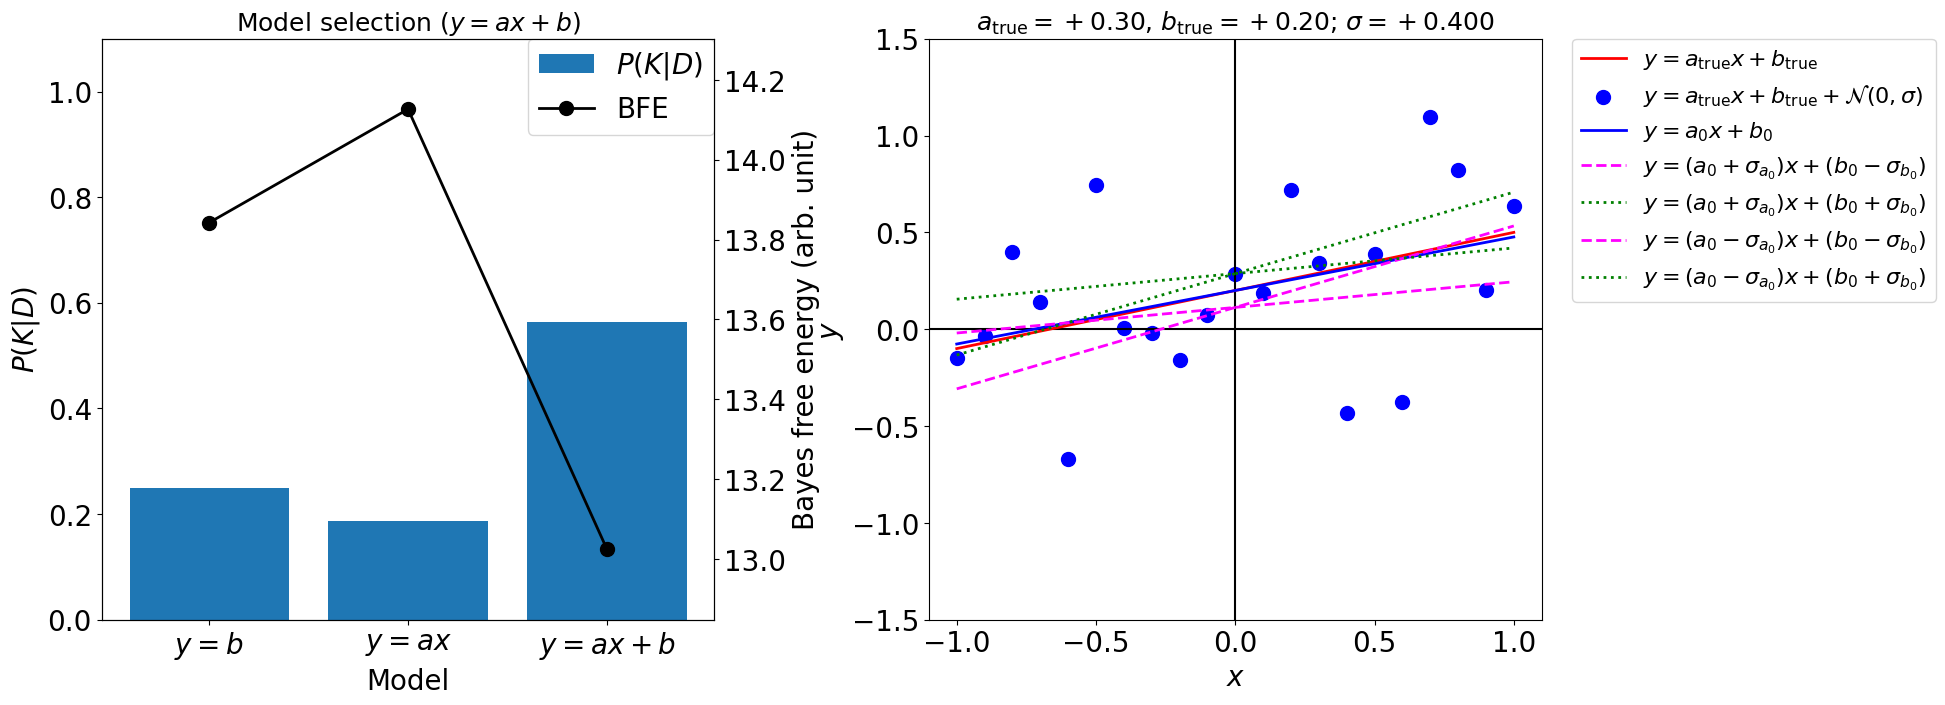

In [19]:
############################################
# fig = GrfLine( x_data, Ysets, title=grf_title, ylim=(-1.5,1.5) )
############################################
fig = Grf_MSelection( PKD, BFEs, x_data, Ysets, ylim=(-1.5,1.5) )
# 図をpdfに保存
pdfName = FilePath + FileBaseName + '-Result-01.pdf'
fig.savefig( pdfName )